<a href="https://colab.research.google.com/github/Tom-Lennox/Kaggle/blob/master/titanic_20200501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# title
# 【result_0428】0.65071


In [0]:
# kaggle APIセット
!pip install kaggle

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
# 「Download 100%.」と表示で成功。

# [kaggle.json]を持参する。
from google.colab import drive
drive.mount('/content/drive')

# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
# titanicをダウンロードします。
!kaggle competitions download -c titanic

# jsonファイルを指定の場所に配置
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
# titanicをダウンロードします。
!kaggle competitions download -c titanic
!ls

Download 100%.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
adc.json  drive  gender_submission.csv	sample_data  test.csv  train.csv


In [6]:
# ▼ all_data作成
import pandas as pd
import numpy as np

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train_x = train.drop("Survived",axis=1)
train_y = train["Survived"]
test_x = pd.read_csv("/content/test.csv")

all_data = pd.concat([train, test], sort=False)

# ▲ all_data作成
# ▽ info
all_data.head()

def counter():
  print('▼ train:', len(train))
  print('▼ test:', len(test))
  print('▼ all_data:', len(all_data))
counter()

print('▼ print(all_data.isnull().sum()[all_data.isnull().sum() > 0])')
print(all_data.isnull().sum()[all_data.isnull().sum() > 0])
print('▼ info')
print(all_data.info())
# △ info
# ▼ 置換、fillna等

# # ohe
# all_data = pd.get_dummies(all_data, columns=['Sex'])
# all_data
# # ohe
# map
all_data['Sex'].unique().tolist()
sex_map = {"female":0, "male":1}
all_data['Sex'] = all_data['Sex'].map(sex_map).astype(int)
print('▼ 確認', all_data['Sex'].unique().tolist())
# map
# ohe, map, カラムを分けるか１つで進むか、どちらが良いかよくわからん。

all_data['Embarked'].fillna('None', inplace=True)
all_data['Embarked'].unique()
all_data['Embarked'].replace(['S', 'C', 'Q', 'None'], [0,1,2,3], inplace=True)
all_data['Embarked'].unique()


# ▲ 置換、fillna等

▼ train: 891
▼ test: 418
▼ all_data: 1309
▼ print(all_data.isnull().sum()[all_data.isnull().sum() > 0])
Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64
▼ info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
▼ 確認 [1, 0]


array([0, 1, 2, 3])

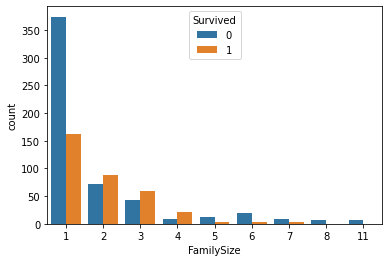

In [14]:
# ▼ 置換、fillna等
all_data['Age'].fillna(all_data['Age'].median(), inplace=True)

import seaborn as sns
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1
train['FamilySize'] = all_data['FamilySize'][:len(train)]
test['FamilySize'] = all_data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', data=train, hue='Survived')
# 家族の人数・生存の確認

# ▲ 置換、fillna等